In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style 
#style.use('grayscale')
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import train_test_split
from matplotlib.colors import LinearSegmentedColormap

from random import shuffle
import random

import matplotlib.cm as cm


/home/billy/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#data_bi=np.loadtxt("Classifier_data_bi_sample.dat",skiprows=1,delimiter=",",usecols=(0,2))
#target_bi=np.ones(data_bi.shape[0])
#data_po=np.loadtxt("Classifier_data_po_sample.dat",skiprows=1,delimiter=",",usecols=(0,2))
#target_po=np.zeros(data_po.shape[0])

data_bi=np.loadtxt("Classifier_data_bi.dat",skiprows=1,delimiter=",",usecols=(0,2))
shuffle(data_bi)
target_bi=np.ones(data_bi.shape[0])
data_po=np.loadtxt("Classifier_data_po.dat",skiprows=1,delimiter=",",usecols=(0,2))
shuffle(data_po)
target_po=np.zeros(data_po.shape[0])


In [2]:
Uncleaned_bi=np.loadtxt("Classifier_data_bi.dat",skiprows=1,delimiter=",")
shuffle(Uncleaned_bi)

Uncleaned_po=np.loadtxt("Classifier_data_po.dat",skiprows=1,delimiter=",")
shuffle(Uncleaned_po)


In [3]:
def makeData(radCut):
    data_bi=[]
    data_po=[]
    for el in Uncleaned_bi:
        if el[3]==1.0 and el[4]==0.0 and el[1]<radCut:
            data_bi.append([el[0],el[2]])

    #shuffle(data_bi)
    data_bi=np.array(data_bi)
    target_bi=np.ones(data_bi.shape[0])

    for el in Uncleaned_po:
        if el[3]==1.0 and el[4]==0.0 and el[1]<radCut:
            data_po.append([el[0],el[2]])
    #shuffle(data_po)
    data_po=np.array(data_po)
    target_po=np.zeros(data_po.shape[0])
    return data_bi,data_po,target_bi,target_po

In [10]:
data_bi,data_po,target_bi,target_po = makeData(4000)

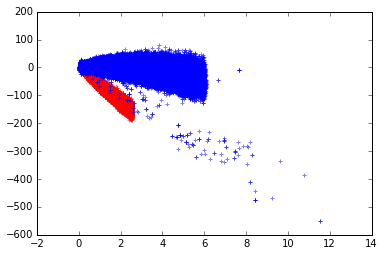

In [11]:
plt.scatter(data_bi[:,0], data_bi[:,1], c='red', alpha=0.5,marker='+')
plt.scatter(data_po[:,0], data_po[:,1], c='blue', alpha=0.5,marker='+')
plt.show()

In [12]:
data=np.concatenate((data_bi,data_po))
target=np.concatenate((target_bi,target_po))
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
print X_test
print y_test

[[  2.25095   -9.93435 ]
 [  1.40667   -6.95456 ]
 [  0.202688   4.0123  ]
 ..., 
 [  0.794541 -48.3737  ]
 [  1.2697   -77.1166  ]
 [  0.766342   0.574918]]
[ 0.  0.  0. ...,  1.  1.  0.]


In [13]:
neuNet= MLPClassifier(activation= 'logistic', algorithm='adam', alpha=1e-4, hidden_layer_sizes=(3, 2), random_state=42)


In [14]:
neuNet.fit(X_train,y_train)

MLPClassifier(activation='logistic', algorithm='adam', alpha=0.0001,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(3, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
print neuNet.score(X_test,y_test)

0.990515680428


(1000, 1000)
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


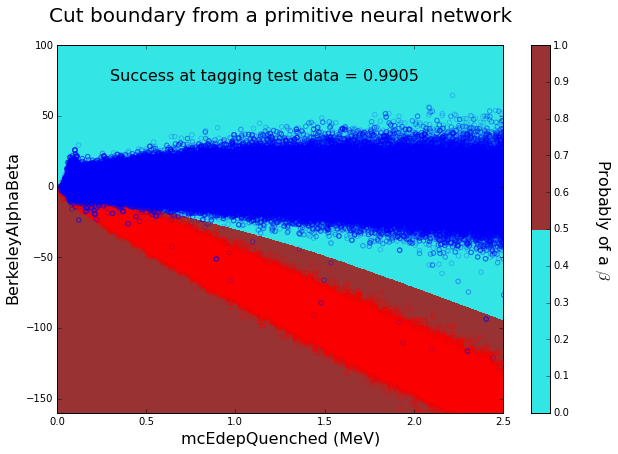

In [29]:
x = np.linspace(0,2.6,1000)
y = np.linspace(-160,100,1000)
xx, yy = np.meshgrid(x, y)
#print np.c_[xx.ravel(), yy.ravel()]
Z = neuNet.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
print Z.shape
print Z

colors = [(0.2, 0.9, 0.9),(0.6,0.2,0.2)]  # R -> G -> B
n_bins = 2  # Discretizes the interpolation into bins
cmap_name = 'my_list'

#fig, axs = plt.subplots(1, 1, figsize=(6, 6))
fig, ax = plt.subplots(1,figsize=(10,10/1.5180))
#fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Create the colormap

cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

#cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm,
#                                orientation='vertical')
#cb1.ax.set_ylabel('# of contacts', rotation=270)


plt.imshow(Z, vmin=0, vmax=1,
           extent=[x.min(), x.max(), y.min(), y.max()],
           interpolation='nearest',aspect="auto",origin='lower', cmap=cm)
plt.title('Cut boundary from a primitive neural network',fontsize=20,y=1.05)
plt.xlabel('mcEdepQuenched (MeV)',fontsize=16)
plt.ylabel('BerkeleyAlphaBeta',fontsize=16)
plt.colorbar()
plt.scatter(data_bi[:,0], data_bi[:,1], alpha=0.2,facecolors='none', edgecolors='r')
plt.scatter(data_po[:,0], data_po[:,1], alpha=0.2,facecolors='none', edgecolors='blue')
plt.xlim([0,2.5])
plt.ylim([-160,100])
plt.annotate(r'Probably of a $\beta$', xy=(2, 1), xytext=(3, 10),  rotation=270,fontsize=16)
plt.annotate(r'Success at tagging test data = '+str(round(neuNet.score(X_test,y_test),4)), xy=(2, 1), xytext=(0.3, 75),  rotation=0,fontsize=16)

plt.savefig("Neural_Network_Boundary_r_4000.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np

#cmaplist=[[0.1,0.4,0.1,1],[0.6,0.1,0.1,1]]

# define the colormap
cmap = plt.cm.jet
print cmap.N
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

print (np.amin(x), np.amax(x), np.amin(y), np.amax(y))

#plt.imshow(Z,extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)),aspect="auto")
plt.pcolor(x,y,Z,cmap="RdBu",vmin=0., vmax=1.)

plt.colorbar()
plt.scatter(data_bi[:,0], data_bi[:,1], c='red', alpha=0.5,marker='+')
plt.scatter(data_po[:,0], data_po[:,1], c='blue', alpha=0.5,marker='+')
plt.xlim([0,2.5])
plt.ylim([-160,100])
plt.show()


In [ ]:
plt.imshow(Z, cmap='RdBu', vmin=0, vmax=1,
           extent=[x.min(), x.max(), y.min(), y.max()],
           interpolation='nearest', origin='lower',aspect="auto")
plt.title('image (interp. nearest)')
plt.colorbar()
plt.scatter(data_bi[:1000,0], data_bi[:1000,1], c='red', alpha=0.5,marker='+')
plt.scatter(data_po[:1000,0], data_po[:1000,1], c='blue', alpha=0.5,marker='+')
plt.xlim([0,2.5])
plt.ylim([-160,100])


In [ ]:
# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x = np.random.rand(20)
y = np.random.rand(20)
tag = np.random.randint(0,20,20)
tag[10:12] = 0 # make sure there are some 0 values to showup as grey

# define the colormap

cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,20,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Very custom cbar [-]', size=12)


In [ ]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

"""
Creating a colormap from a list of colors
-----------------------------------------
Creating a colormap from a list of colors can be done with the `from_list`
method of `LinearSegmentedColormap`. You must pass a list of RGB tuples that
define the mixture of colors from 0 to 1.


Creating custom colormaps
-------------------------
It is also possible to create a custom mapping for a colormap. This is
accomplished by creating dictionary that specifies how the RGB channels
change from one end of the cmap to the other.

Example: suppose you want red to increase from 0 to 1 over the bottom
half, green to do the same over the middle half, and blue over the top
half.  Then you would use:

cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0))}

If, as in this example, there are no discontinuities in the r, g, and b
components, then it is quite simple: the second and third element of
each tuple, above, is the same--call it "y".  The first element ("x")
defines interpolation intervals over the full range of 0 to 1, and it
must span that whole range.  In other words, the values of x divide the
0-to-1 range into a set of segments, and y gives the end-point color
values for each segment.

Now consider the green. cdict['green'] is saying that for
0 <= x <= 0.25, y is zero; no green.
0.25 < x <= 0.75, y varies linearly from 0 to 1.
x > 0.75, y remains at 1, full green.

If there are discontinuities, then it is a little more complicated.
Label the 3 elements in each row in the cdict entry for a given color as
(x, y0, y1).  Then for values of x between x[i] and x[i+1] the color
value is interpolated between y1[i] and y0[i+1].

Going back to the cookbook example, look at cdict['red']; because y0 !=
y1, it is saying that for x from 0 to 0.5, red increases from 0 to 1,
but then it jumps down, so that for x from 0.5 to 1, red increases from
0.7 to 1.  Green ramps from 0 to 1 as x goes from 0 to 0.5, then jumps
back to 0, and ramps back to 1 as x goes from 0.5 to 1.

row i:   x  y0  y1
                /
               /
row i+1: x  y0  y1

Above is an attempt to show that for x in the range x[i] to x[i+1], the
interpolation is between y1[i] and y0[i+1].  So, y0[0] and y1[-1] are
never used.

"""
# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10


# --- Colormaps from a list ---

colors = [(0, 0, 0),(1,1,1)]  # R -> G -> B
n_bins = [2, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)


# --- Custom colormaps ---

cdict1 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 1.0),
                   (1.0, 0.1, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.1),
                   (0.5, 1.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict3 = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.8, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.9, 0.9),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.4),
                   (0.25, 1.0, 1.0),
                   (0.5, 1.0, 0.8),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

# Make a modified version of cdict3 with some transparency
# in the middle of the range.
cdict4 = cdict3.copy()
cdict4['alpha'] = ((0.0, 1.0, 1.0),
                #   (0.25,1.0, 1.0),
                   (0.5, 0.3, 0.3),
                #   (0.75,1.0, 1.0),
                   (1.0, 1.0, 1.0))


# Now we will use this example to illustrate 3 ways of
# handling custom colormaps.
# First, the most direct and explicit:

blue_red1 = LinearSegmentedColormap('BlueRed1', cdict1)

# Second, create the map explicitly and register it.
# Like the first method, this method works with any kind
# of Colormap, not just
# a LinearSegmentedColormap:

blue_red2 = LinearSegmentedColormap('BlueRed2', cdict2)
plt.register_cmap(cmap=blue_red2)

# Third, for LinearSegmentedColormap only,
# leave everything to register_cmap:

plt.register_cmap(name='BlueRed3', data=cdict3)  # optional lut kwarg
plt.register_cmap(name='BlueRedAlpha', data=cdict4)

# Make the figure:

fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Make 4 subplots:

im1 = axs[0, 0].imshow(Z, interpolation='nearest', cmap=blue_red1)
fig.colorbar(im1, ax=axs[0, 0])

cmap = plt.get_cmap('BlueRed2')
im2 = axs[1, 0].imshow(Z, interpolation='nearest', cmap=cmap)
fig.colorbar(im2, ax=axs[1, 0])

# Now we will set the third cmap as the default.  One would
# not normally do this in the middle of a script like this;
# it is done here just to illustrate the method.

plt.rcParams['image.cmap'] = 'BlueRed3'

im3 = axs[0, 1].imshow(Z, interpolation='nearest')
fig.colorbar(im3, ax=axs[0, 1])
axs[0, 1].set_title("Alpha = 1")

# Or as yet another variation, we can replace the rcParams
# specification *before* the imshow with the following *after*
# imshow.
# This sets the new default *and* sets the colormap of the last
# image-like item plotted via pyplot, if any.
#

# Draw a line with low zorder so it will be behind the image.
axs[1, 1].plot([0, 10*np.pi], [0, 20*np.pi], color='c', lw=20, zorder=-1)

im4 = axs[1, 1].imshow(Z, interpolation='nearest')
fig.colorbar(im4, ax=axs[1, 1])

# Here it is: changing the colormap for the current image and its
# colorbar after they have been plotted.
im4.set_cmap('BlueRedAlpha')
axs[1, 1].set_title("Varying alpha")
#

fig.suptitle('Custom Blue-Red colormaps', fontsize=16)

plt.show()

In [ ]:

a = ['Spears', "Adele", "NDubz", "Nicole", "Cristina"]
b = [1,2,3,4,5]
z = zip(a, b)
# => [('Spears', 1), ('Adele', 2), ('NDubz', 3), ('Nicole', 4), ('Cristina', 5)]
random.shuffle(z)
a, b = zip(*z)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10


# --- Colormaps from a list ---

colors = [(1, 1, 1),(0,0,0)]  # R -> G -> B
n_bins = 2  # Discretizes the interpolation into bins
cmap_name = 'my_list'

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
# Fewer bins will result in "coarser" colomap interpolation
im = axs.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
axs.set_title("N bins: %s" % n_bins)
fig.colorbar(im, ax=axs)

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_bi[:,1], data_bi[:,2], data_bi[:,0],c='red', marker="*")
ax.scatter(data_po[:,1], data_po[:,2], data_po[:,0],c='blue', marker="*")

ax.set_xlabel('posr (mm)')
ax.set_ylabel('MCEdepQuenched (MeV)')
ax.set_zlabel('Bab')

plt.show()